In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Моделирование ОУ в ДУ

Модель ВИЧ-инфекции (HIV)

- H - число здоровых клеток
- I - число инфицированных клеток
- V - число клеток вируса

$$ \begin{cases}
\frac{dH(t)}{dt} = kr_1 - kr_2 H(t) - kr_3 H(t) V(t) \\
\frac{dI(t)}{dt} = kr_3H(t)V(t) - kr_4I(t)\\
\frac{dV(t)}{dt} = -kr_3H(t)V(t) - kr_5V(t) + kr_6 I(t)
\end{cases} $$


In [2]:
kr1 = 1e5 # новых здоровых клеток в год
kr2 = 0.1 # смертность здоровых клеток
kr3 = 2e-7 # здоровые клетки превращаются в инфицированные клетки
kr4 = 0.5 # уровень смертности инфицированных клеток
kr5 = 5 # смертность вируса
kr6 = 100 # уровень появления вируса от инфицированных клеток

In [3]:
def hiv(x, t):
    
    h, i, v = x[0], x[1], x[2]
    p = kr3 * h * v
    dhdt = kr1 - kr2 * h - p 
    didt = p - kr4 * i
    dvdt = -p - kr5 * v + kr6 * i
    
    return [dhdt, didt, dvdt]

In [4]:
x0 = [1e6, 0, 100] # здоровые клетки, инфицированные клетки, вирус
t = np.linspace(0, 15, 1000)
x = odeint(hiv, x0, t)

In [5]:
h = x[:, 0]
i = x[:, 1]
v = x[:, 2]

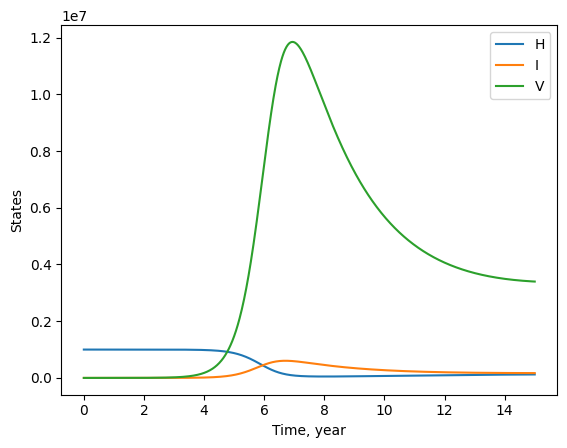

In [6]:
plt.plot(t, h, label='H')
plt.plot(t, i, label='I')
plt.plot(t, v, label='V')
plt.ylabel('States')
plt.xlabel('Time, year')

plt.legend()

plt.show()

## Cчитываем данные

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel('data/hiv_data.xlsx')

In [9]:
v_point = np.power(10, df['lv'])

In [31]:
z = np.polyfit(df['time'], v_point, 2)

In [32]:
p = np.poly1d(z)

In [33]:
p(df['time'])

array([-5954507.13980208, -5060323.96726693, -4189458.08523209,
       -3341909.49369757, -2517678.19266337, -1716764.18212948,
        -939167.46209592,  -184888.03256266,   546074.10647027,
        1253718.95500289,  1938046.51303519,  2599056.78056717,
        3236749.75759884,  3851125.44413019,  4442183.84016123,
        5009924.94569194,  5554348.76072234,  6075455.28525242,
        6573244.51928219,  7047716.46281164,  7498871.11584077,
        7926708.47836959,  8331228.55039809,  8712431.33192627,
        9070316.82295413,  9404885.02348168,  9716135.93350891,
       10004069.55303582, 10268685.88206242, 10509984.92058871,
       10727966.66861467, 10922631.12614031, 11093978.29316564,
       11242008.16969065, 11366720.75571535, 11468116.05123973,
       11546194.05626379, 11600954.77078754, 11632398.19481096,
       11640524.32833408, 11625333.17135687, 11586824.72387935,
       11524998.98590151, 11439855.95742336, 11331395.63844488,
       11199618.0289661 , 11044523.12898

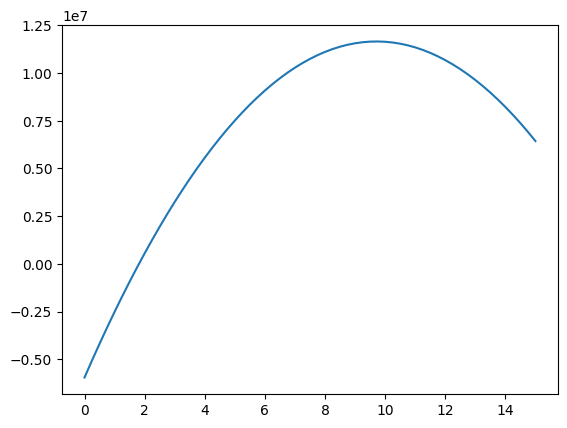

In [34]:
# df.plot.scatter(x='time', y='lv')
plt.plot(df['time'], p(df['time']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


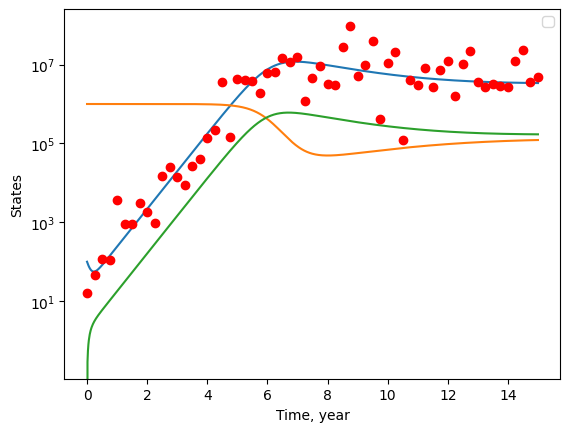

In [37]:
plt.semilogy(t, v)
plt.semilogy(t, h)
plt.semilogy(t, i)
plt.semilogy(df['time'], v_point, 'ro')

plt.ylabel('States')
plt.xlabel('Time, year')

plt.legend()
plt.show()